In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np

# Cleaning the data

In [2]:
import glob
from data_cleaning import clean_nse_csv

DATA_PATH = "data/*.csv"

all_files = glob.glob(DATA_PATH)

cleaned_dfs = []

for file in all_files:
    symbol = file.split("/")[-1].split("_")[0]

    df = clean_nse_csv(file, symbol)
    cleaned_dfs.append(df)
final_df = pd.concat(cleaned_dfs, ignore_index=True)

c:\Users\radhi\OneDrive - Manipal Academy of Higher Education\Desktop\PR research\data_cleaning.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trade_date'] = pd.to_datetime(df['trade_date'], errors='coerce')
c:\Users\radhi\OneDrive - Manipal Academy of Higher Education\Desktop\PR research\data_cleaning.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trade_date'] = pd.to_datetime(df['trade_date'], errors='coerce')
c:\Users\radhi\OneDrive - Manipal Academy of Higher Education\Desktop\PR research\data_cleaning.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a forma

## Saving master file containing all the data

In [3]:
final_df.to_csv("cleaned_nse_data.csv", index=False)

# Exploratory Data Analysis

In [4]:
df = pd.read_csv(
    "cleaned_nse_data.csv",
    parse_dates=["trade_date"]
)

df = df.sort_values("trade_date").reset_index(drop=True)

In [5]:
df.info()
df.head()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5208 entries, 0 to 5207
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   symbol         5208 non-null   object        
 1   trade_date     5208 non-null   datetime64[ns]
 2   open           5208 non-null   float64       
 3   high           5208 non-null   float64       
 4   low            5208 non-null   float64       
 5   close          5208 non-null   float64       
 6   shares_traded  5208 non-null   int64         
 7   turnover_cr    5208 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 325.6+ KB


,symbol,trade_date,open,high,low,close,shares_traded,turnover_cr
5203,data\NIFTY 50-01-01-2025-to-31-12-2025.csv,2025-12-24,26170.65,26236.40,26123.0,26142.10,188846828,17474.44
5204,data\NIFTY 50-01-01-2025-to-31-12-2025.csv,2025-12-26,26121.25,26144.20,26008.6,26042.30,142243763,12263.06
5205,data\NIFTY 50-01-01-2025-to-31-12-2025.csv,2025-12-29,26063.35,26106.80,25920.3,25942.10,234312888,18184.45
5206,data\NIFTY 50-01-01-2025-to-31-12-2025.csv,2025-12-30,25940.90,25976.75,25878.0,25938.85,396893959,39492.31
5207,data\NIFTY 50-01-01-2025-to-31-12-2025.csv,2025-12-31,25971.05,26187.95,25969.0,26129.60,246314941,20703.99


In [6]:
date_diff = df['trade_date'].diff().value_counts()
date_diff.head()

trade_date
1 days    3958
3 days     965
2 days     167
4 days     106
5 days      10
Name: count, dtype: int64

Data is relatively continuous. 

## Close Price

In stock market data, the close price (or closing price) is the last price at which a stock or asset is traded during a regular trading session for that day. It’s considered the official price of the stock at the end of the trading day.

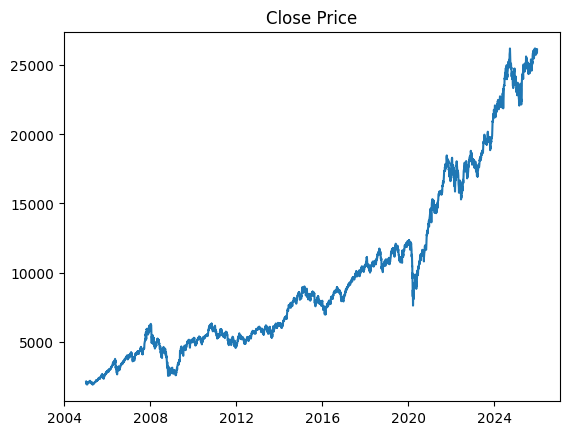

In [7]:
plt.figure()
plt.plot(df['trade_date'], df['close'])
plt.title("Close Price")
plt.show()

### Analysis

#### 1. Long-term Trend
- The overall trajectory shows a strong upward trend over 20 years.
- Despite periodic dips, the market has generally increased, reflecting long-term growth in the Indian stock market.

#### 2. Major Market Corrections / Crashes
- **2008–2009**: Sharp drop during the global financial crisis, followed by recovery in subsequent years.
- **2020**: Significant dip corresponding to the COVID-19 market crash, followed by a rapid recovery.

#### 3. Volatility
- Short-term fluctuations are present throughout the period.
- Higher volatility is noticeable during crisis periods.
- Post-2020, the market exhibits sharper movements, indicating higher liquidity or speculative trading.

#### 4. Recovery Patterns
- After each major dip, the market recovers and often reaches higher peaks than before.
- Shows resilience and sustained positive investor sentiment over the long term.

#### 5. Compound Growth
- Market grew from ~2,000 in 2005 to over 25,000 in 2025 (~12–13x increase).
- Roughly translates to a 12–15% annualized return (excluding dividends).

#### 6. Investment Insights
- Long-term investments would have benefited from holding through volatility.
- Short-term trading during volatile periods is riskier but can offer gains if timed correctly.


## Daily Log Returns 

Daily log returns are a measure of an asset's price change over a single day, calculated as the natural logarithm of the ratio of the closing price to the previous day's closing price.  The formula is:

$ r_t = \ln\left(\frac{P_t}{P_{t-1}}\right) = \ln(P_t) - \ln(P_{t-1}) $

Where:
 - $\ln $ = natural logarithm 
 - $ P_t $  = closing price today
 - $ P_{t-1} $ = closing price yesterday



In [8]:
df['log_return'] = np.log(df['close']).diff()
df['log_return'].describe()

df["log_return"] = pd.to_numeric(df["log_return"], errors="coerce")
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=["log_return"])


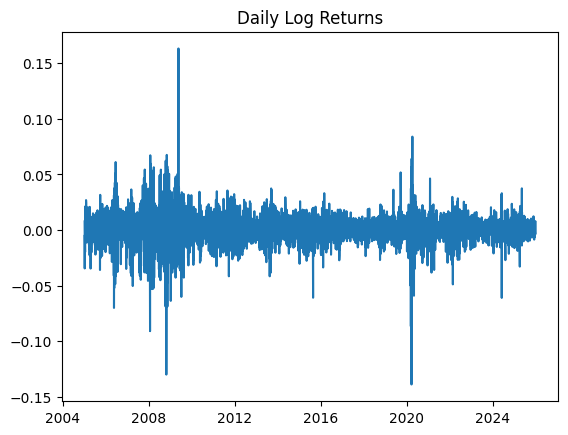

In [9]:
plt.figure()
plt.plot(df['trade_date'], df['log_return'])
plt.title("Daily Log Returns")
plt.show()

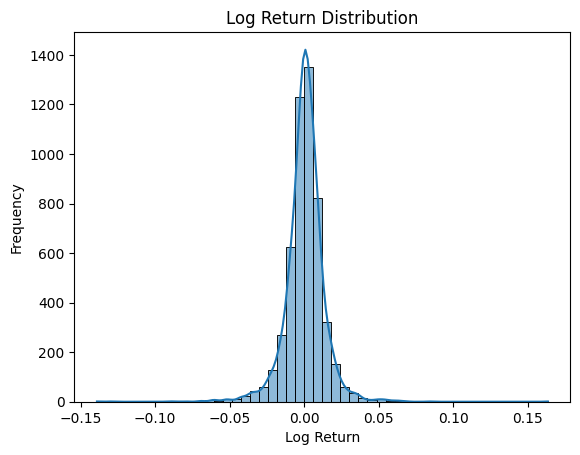

In [21]:
plt.figure()
sns.histplot(df["log_return"], bins=50, kde=True)
plt.title("Log Return Distribution")
plt.xlabel("Log Return")
plt.ylabel("Frequency")
plt.show()


importing necesary libraries 

In [11]:
import seaborn as sns
from scipy.stats import skew, kurtosis
from statsmodels.tsa.stattools import adfuller

## Volatility 
Volatility measures how much an asset’s returns fluctuate over time.
In quantitative finance, volatility = standard deviation of returns.
$ \sigma_{\text{daily}} = 
\sqrt{
\frac{1}{N - 1}
\sum_{t=1}^{N}
\left(r_t - \bar{r}\right)^2
} $

Where:
 - $r_t$ = daily log return  
 - $\bar{r}$ = mean of returns  
 - $N$ = number of observations  
 - $\sigma_{\text{daily}}$ = daily volatility  


In [12]:
daily_volatility = df["log_return"].std()
print("Daily Volatility:", daily_volatility)


Daily Volatility: 0.013138840870302001


## Annualized volatility
Daily volatility is hard to interpret directly. So we scale it to a yearly measure.
If returns are independent and identically distributed:

$ \sigma_{\text{annual}} = \sigma_{\text{daily}} \times \sqrt{T} $

For stock markets:

$ T = 252 $

So,

$ \sigma_{\text{annual}} = \sigma_{\text{daily}} \times \sqrt{252} $


In [13]:
annual_volatility = daily_volatility * np.sqrt(252)
print("Annualized Volatility:", annual_volatility)


Annualized Volatility: 0.2085726327508233


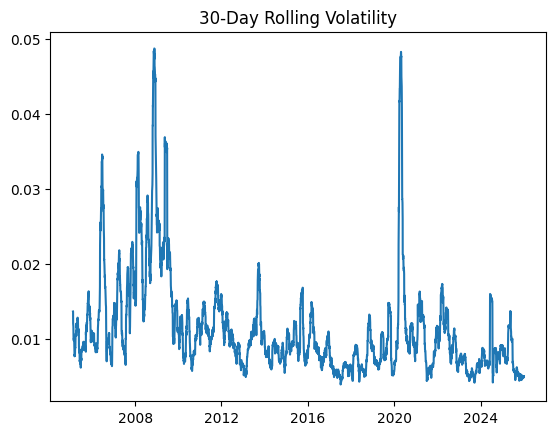

In [14]:
df["rolling_vol_30"] = df["log_return"].rolling(window=30).std()

plt.figure()
plt.plot(df["trade_date"], df["rolling_vol_30"])
plt.title("30-Day Rolling Volatility")
plt.show()


## Skewness

Skewness measures the **asymmetry** of a return distribution.

Sample skewness:

$
\text{Skewness} =
\frac{
\frac{1}{N} \sum_{t=1}^{N} (r_t - \bar{r})^3
}{
\left(
\frac{1}{N} \sum_{t=1}^{N} (r_t - \bar{r})^2
\right)^{3/2}
}
$

Where:
- $r_t$ = return at time $t$  
- $\bar{r}$ = mean return  
- $N$ = number of observations 

#### Interpretation

- Skewness = 0 → symmetric distribution  
- Skewness > 0 → right-skewed (large positive outliers)  
- Skewness < 0 → left-skewed (large negative crashes more frequent)

In equity markets, skewness is often **negative**.

## Kurtosis

Kurtosis measures the **tailedness** of the distribution (frequency of extreme values).

Sample kurtosis:

$
\text{Kurtosis} =
\frac{
\frac{1}{N} \sum_{t=1}^{N} (r_t - \bar{r})^4
}{
\left(
\frac{1}{N} \sum_{t=1}^{N} (r_t - \bar{r})^2
\right)^2
}
$

Excess kurtosis:

$
\text{Excess Kurtosis} = \text{Kurtosis} - 3
$

Where:
- $r_t$ = return at time $t$  
- $\bar{r}$ = mean return  
- $N$ = number of observations  

#### Interpretation

- Kurtosis = 3 → Normal distribution  
- Excess Kurtosis = 0 → Normal tails  
- Excess Kurtosis > 0 → Fat tails (extreme events more frequent)  
- Excess Kurtosis < 0 → Thin tails  

In financial markets, excess kurtosis is usually **positive**, meaning returns have fat tails.

In [19]:
ret_skew = skew(df["log_return"])
ret_kurt = kurtosis(df["log_return"])

print("Skewness:", ret_skew)
print("Kurtosis:", ret_kurt)


Skewness: -0.35481615347023493
Kurtosis: 13.182957195631921


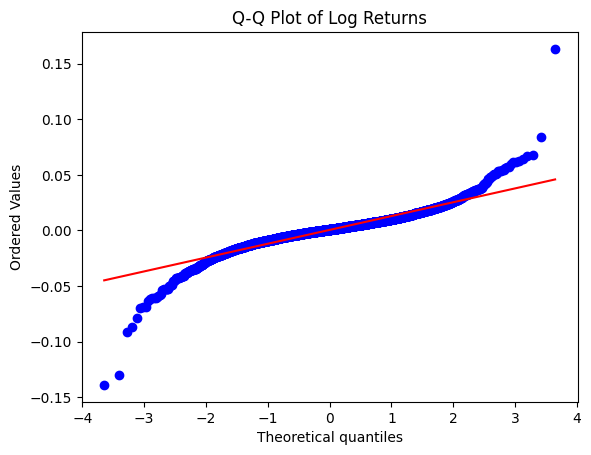

In [22]:
import scipy.stats as stats

plt.figure()
stats.probplot(df["log_return"], dist="norm", plot=plt)
plt.title("Q-Q Plot of Log Returns")
plt.show()


A Q–Q (Quantile–Quantile) plot compares the distribution of your data to a theoretical distribution (usually Normal)

## Augmented Dickey–Fuller (ADF) Test

The ADF test is used to check whether a time series is **stationary**.

It tests for the presence of a **unit root**.

### Hypotheses

- $H_0$: The series has a unit root (non-stationary)  
- $H_1$: The series is stationary  

If the p-value < 0.05 → reject $H_0$ → series is stationary.


### ADF Regression Equation

$
\Delta y_t =
\alpha +
\beta t +
\gamma y_{t-1} +
\sum_{i=1}^{p} \delta_i \Delta y_{t-i} +
\varepsilon_t
$

Where:

- $y_t$ = time series  
- $\Delta y_t = y_t - y_{t-1}$ (first difference)  
- $\alpha$ = constant  
- $\beta t$ = deterministic trend (optional)  
- $\gamma$ = coefficient for unit root test  
- $p$ = number of lagged difference terms  
- $\varepsilon_t$ = white noise error  

### Decision Rule

The key parameter is:

$
\gamma
$

If:

$
\gamma = 0
$

→ unit root exists → non-stationary  

If:

$
\gamma < 0
$

→ stationary  

The test statistic is:

$
ADF = \frac{\hat{\gamma}}{SE(\hat{\gamma})}
$

Compare this with critical values.


### Why It Matters in Finance

For stock data:

- **Price series** → usually non-stationary  
- **Log returns** → usually stationary  

So typically:

- Run ADF on prices → fail to reject $H_0$  
- Run ADF on log returns → reject $H_0$


## Practical Interpretation

If:

- Test statistic < critical value  
- p-value < 0.05  

Then → series is stationary.

If not → difference the series:

$
\Delta y_t = y_t - y_{t-1}
$

and test again.



In [23]:
adf_result = adfuller(df["log_return"])

print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

for key, value in adf_result[4].items():
    print(f"Critical Value ({key}): {value}")


ADF Statistic: -14.057859883097008
p-value: 3.094129951741445e-26
Critical Value (1%): -3.4316125515723472
Critical Value (5%): -2.862097915582811
Critical Value (10%): -2.5670669783999807


The Augmented Dickey–Fuller (ADF) test results indicate strong evidence of stationarity in the analyzed series. The test statistic of −14.06 is substantially lower than all critical values at the 1%, 5%, and 10% significance levels (−3.43, −2.86, and −2.57 respectively), leading to rejection of the null hypothesis of a unit root. Additionally, the extremely small p-value (3.09 × 10⁻²⁶) confirms that the result is statistically significant. Therefore, the time series does not exhibit a unit root and can be considered stationary, making it suitable for further statistical modeling and regime analysis.